In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
%run -i '../../../../../../utils.py'

# Get data

In [2]:
# read meta data
df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_meta = df_meta.drop('Diet', axis=1)
df_meta = df_meta.rename({'MiceID':'SubjectID'}, axis=1)
df_meta.head()

,SubjectID,Vendor,Day,RandomizedGroup
SampleID,,,,
sample141,BI1,Beijing,0,A
sample142,BI2,Beijing,0,B
sample143,BI3,Beijing,0,D
sample144,BI4,Beijing,0,E
sample145,BI5,Beijing,0,C


In [3]:
# read SCFA data
df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [4]:
# read bacterial abundance
df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_bac = df_bac/df_bac.max().max()
df_bac.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,0.000291,0.000019,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000170,0.0,0.0,0.0,0.000444,0.0,0.0,0.0,0.000356
sample132,0.0,0.001090,0.000135,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000215,0.0,0.0,0.0,0.000286,0.0,0.0,0.0,0.002698
sample133,0.0,0.000097,0.000122,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000597,0.0,0.0,0.0,0.000502
sample134,0.0,0.001303,0.000027,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000285,0.0,0.0,0.0,0.002473,0.0,0.0,0.0,0.002344
sample135,0.0,0.000246,0.000114,0.0,0.0,0.0,0.0,0.0,0.000034,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.001565,0.0,0.0,0.0,0.001435


# Run RandomForest

In [5]:
for vendor_to_exclude in ['Shanghai','Hunan','Guangdong','Beijing']:
    df_rf_reg, df_rf_opt_paras = train_scfa_dynamics_model(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        exclude_group=None,
        exclude_vendor=vendor_to_exclude,
        model='RandomForest',
        use_deriv_scfa=True,
        use_deriv_microbiome=False 
    )
    df_rf_opt_paras.to_csv('optimal_rf_parameters_exclude_vendor%s.csv'%(vendor_to_exclude))
    df_rf_reg.to_csv('rf_regression_exclude_vendor%s.csv'%(vendor_to_exclude))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.8min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.8min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.6min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.7min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.7min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.7min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.3min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.1min finished


# Compare observed and predicted SCFA production using training dataset

In [18]:
def predict_scfa_deriv(addVar,vendor_to_exclude):
    df_pred = None

    # get raw data
    df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
    df_meta = df_meta[df_meta.Diet=='Inulin']
    df_meta = df_meta.drop('Diet', axis=1)
    df_meta = df_meta.rename({'MiceID':'SubjectID'}, axis=1)
    df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
    df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)

    # get trained model
    target_scfa=['Acetate','Butyrate','Propionate']
    if addVar is not None:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_w_SCFA_exclude_vendor%s.csv'%(vendor_to_exclude), index_col=0)
    else:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_no_SCFA_exclude_vendor%s.csv'%(vendor_to_exclude), index_col=0)

    target_scfa_sliced, selected_topN_bac, df_meta_sliced, df_bac_sliced, df_bac_deriv, df_scfa_sliced, df_scfa_deriv = data_processing_scfa(
        df_meta, df_bac, df_scfa, target_scfa, topN=40, exclude_group=None, exclude_vendor=vendor_to_exclude, use_deriv_scfa=True, use_deriv_microbiome=False)

    _,_,reg = train_scfa_dynamics_model(
        df_meta=df_meta, # meta data
        df_bac=df_bac,  # relative abundace or absolute abundance of gut microbiome
        df_scfa=df_scfa, # SCFA measurement
        target_scfa=target_scfa, # dependent variable(s) in the regression
        topN=40, # keep only the most abundance N taxa in the model
        normalize_X=True, # normalize maximum of bacterial abundance to 1
        exclude_group=None, # group of mice excluded from model training
        exclude_vendor=vendor_to_exclude, # group of mice excluded from model training
        model='RandomForest',# regression model
        opt_params = df_opt_paras, # optimal model parameters
        addVar=addVar, # if True, add SCFA addVar, i.e., dSCFA/dt = f(microbiome, SCFA)
        use_deriv_scfa=True,
        use_deriv_microbiome=False
    )

    # predict SCFA derivative using optimized model
    for scfa_ in target_scfa:
        df_pred_tmp = deepcopy(df_scfa_deriv)
        df_pred_tmp = df_pred_tmp[[x for x in df_pred_tmp.columns if x not in list(set(target_scfa)-set([scfa_]))]]
        df_pred_tmp = df_pred_tmp.rename({scfa_:'SCFA_deriv_observed'}, axis=1)
        df_pred_tmp['SCFA_mol'] = scfa_
        df_pred_tmp['SCFA_value_observed'] = df_scfa_sliced[scfa_]

        if addVar is not None:
            X_var = np.concatenate((np.asarray(df_bac_deriv.values), np.asarray(df_scfa_sliced[scfa_]).reshape(-1,1)), 1)
        else:
            X_var = np.asarray(df_bac_deriv.values)
        X_var = X_var/X_var.max().max()
        df_pred_tmp['SCFA_deriv_predicted'] = reg[scfa_].predict(X_var)

        if df_pred is None:
            df_pred = df_pred_tmp
        else:
            df_pred = pd.concat([df_pred, df_pred_tmp], ignore_index=True)

    return df_pred

In [20]:
for addVar in ['SCFA', None]:
    df = None
    for idx_j, vendor_to_exclude in enumerate(['Guangdong','Shanghai','Hunan','Beijing']):
        df_tmp = predict_scfa_deriv(addVar=addVar, vendor_to_exclude=vendor_to_exclude)
        if idx_j==0:
            df = df_tmp
        else:
            df = pd.concat([df, df_tmp], ignore_index=True)
    df['RelativeError'] = (df['SCFA_deriv_predicted']-df['SCFA_deriv_observed'])/df['SCFA_deriv_observed']*100
    df['RelativeAbsError'] = np.abs(df['RelativeError'])
    if addVar:
        df.to_csv('training_error_extrapolation_w_SCFA.csv')
    else:
        df.to_csv('training_error_extrapolation_no_SCFA.csv')

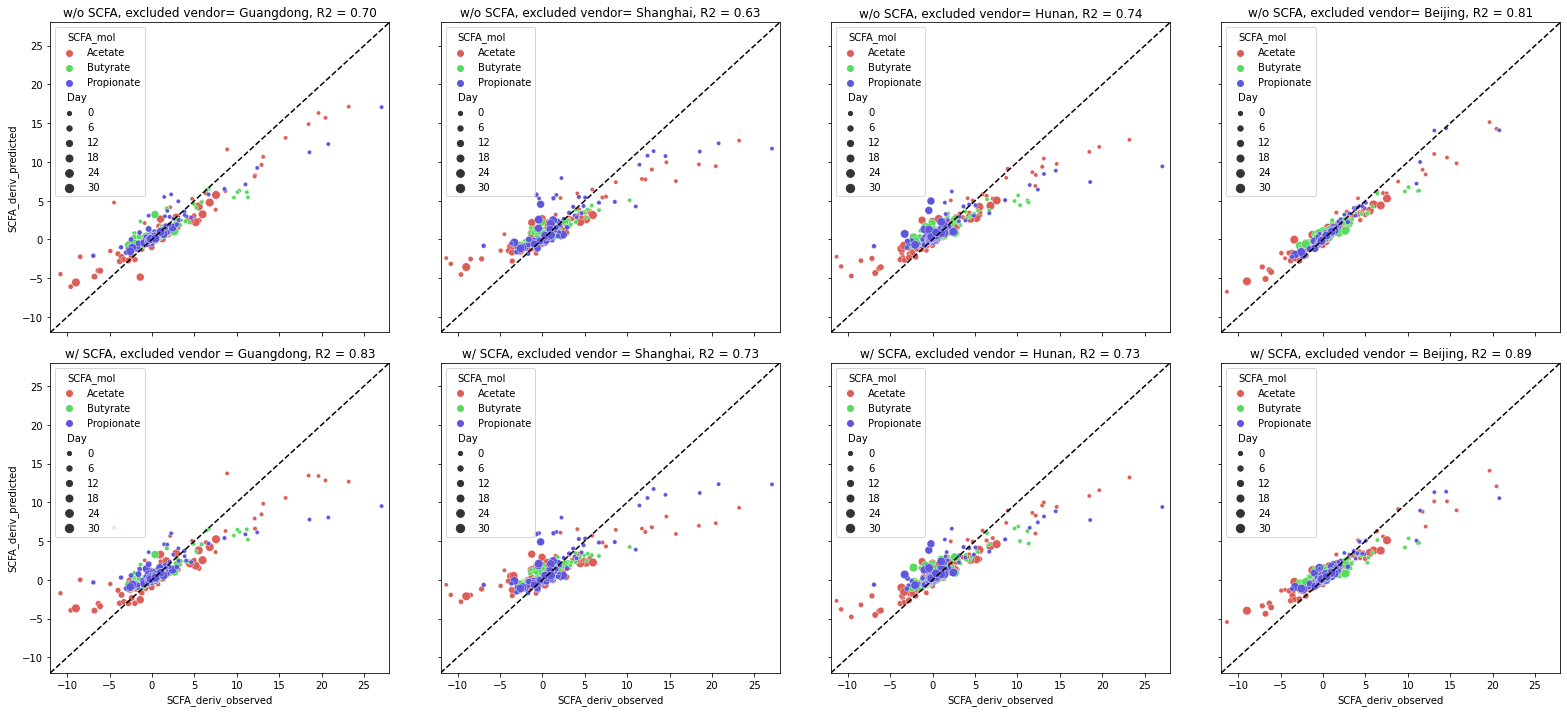

In [19]:
fig, ax = plt.subplots(figsize=(22,10), nrows=2, ncols=4, sharex=True, sharey=True)

for idx_i,addVar in enumerate(['SCFA', None]):
    for idx_j, vendor_to_exclude in enumerate(['Guangdong','Shanghai','Hunan','Beijing']):
        df_pred = predict_scfa_deriv(addVar=addVar, vendor_to_exclude=vendor_to_exclude)
        _ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred, ax=ax[idx_i,idx_j])
        _ = ax[idx_i,idx_j].plot([-12,28],[-12,28],'k--')
        _ = ax[idx_i,idx_j].set_xlim([-12,28])
        _ = ax[idx_i,idx_j].set_ylim([-12,28])
        if addVar is not None:
            _ = ax[1,idx_j].set_title('w/ SCFA, excluded vendor = %s, R2 = %2.2f'%(vendor_to_exclude,r2_score(df_pred.SCFA_deriv_observed, df_pred.SCFA_deriv_predicted)))
        else:
            _ = ax[0,idx_j].set_title('w/o SCFA, excluded vendor= %s, R2 = %2.2f'%(vendor_to_exclude,r2_score(df_pred.SCFA_deriv_observed, df_pred.SCFA_deriv_predicted)))
            
plt.tight_layout()